In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pickle


# Load the dataset

In [42]:
data = pd.read_csv('train.csv')

# Handle missing values


In [43]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Define features and target

In [44]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = data[features]
y = data[target]


# Encode categorical variables

In [45]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'].astype(str))

/var/folders/51/31jjs3fx7sq78_q7kt_ghwkr0000gn/T/ipykernel_29194/2750445987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
/var/folders/51/31jjs3fx7sq78_q7kt_ghwkr0000gn/T/ipykernel_29194/2750445987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'].astype(str))


# Standardize numerical features

In [46]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

/var/folders/51/31jjs3fx7sq78_q7kt_ghwkr0000gn/T/ipykernel_29194/596200898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


# Create a new feature 'FamilySize'

In [47]:
# X['FamilySize'] = X['SibSp'] + X['Parch']
# X.drop(columns=['SibSp','Parch'],inplace=True)

<Axes: >

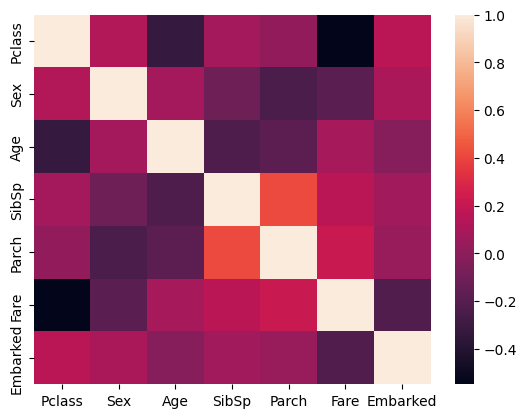

In [48]:
import seaborn as sns
sns.heatmap(X.corr())

# Perform oversampling using RandomOverSampler

In [49]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the dataset into train and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

# Create a pipeline

In [51]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


# Define hyperparameter grid for Gradient Boosting Classifier

In [52]:
param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__max_depth': [3, 5, 10],
    'classifier__subsample': [0.8, 1.0]
}


# obtained best parameters are--

In [53]:
# param_grid = {
#     'classifier__n_estimators': [200],
#     'classifier__learning_rate': [0.05],
#     'classifier__max_depth': [5],
#     'classifier__subsample': [0.8]
# }


# Hyperparameter tuning using GridSearchCV

In [54]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator

In [ ]:
best_estimator = grid_search.best_estimator_

In [ ]:
best_estimator

Pipeline(steps=[('imputer', SimpleImputer()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'))),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

# Make predictions on the test data

In [ ]:
y_pred = best_estimator.predict(X_test)

# Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 92.72727272727272


# Accuracy: 92.72727272727272


# Save the trained model along with its parameters as a pickle file

In [ ]:

model_with_params = {
    'model': best_estimator,
    'params': grid_search.best_params_
}
model_filename = 'gradient_boosting_model_with_params.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_with_params, file)

print(f'Model with parameters saved as {model_filename}')

Model with parameters saved as gradient_boosting_model_with_params.pkl


In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')